## Volatility

####  From a financial standpoint, the standard deviation can help investors quantify how risky an investment is and determine their minimum required return on the investment.

- Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (252)
- If standard deviation of daily returns were 2%, the annualized volatility will be = 2%*Sqrt(252) = 31.6%

In [1]:
import pandas_datareader as pdr

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [5]:
ticker = 'AAPL'
start = dt.datetime(2019, 1, 1)

data = pdr.get_data_yahoo(ticker, start)

In [6]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565


In [8]:
# create a new col for pct change
#Percentage change between the current and a prior element.

data['pct_change'] = data['Close'].pct_change()

In [9]:
data.head()  #the 1st row is NaN

,High,Low,Open,Close,Volume,Adj Close,pct_change
Date,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229,NaN
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078,-0.099607
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378,0.042689
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170,-0.002226
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565,0.019063


In [11]:
# need to use np.log()
data['Log return'] = np.log(data['Close']/data['Close'].shift())

In [12]:
data.head()  #compare data in pct_change and Log return cols

,High,Low,Open,Close,Volume,Adj Close,pct_change,Log return
Date,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229,NaN,NaN
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078,-0.099607,-0.104924
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378,0.042689,0.041803
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170,-0.002226,-0.002228
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565,0.019063,0.018884


In [14]:
# see inside the log function
data['Close']/data['Close'].shift()

Date
2019-01-02         NaN
2019-01-03    0.900393
2019-01-04    1.042689
2019-01-07    0.997774
2019-01-08    1.019063
                ...   
2021-10-25    0.999664
2021-10-26    1.004575
2021-10-27    0.996852
2021-10-28    1.024992
2021-10-29    0.981844
Name: Close, Length: 714, dtype: float64

In [17]:
# shift the data down, ex: shift(2) down for 2 rows
data['Close'].shift()

Date
2019-01-02           NaN
2019-01-03     39.480000
2019-01-04     35.547501
2019-01-07     37.064999
2019-01-08     36.982498
                 ...    
2021-10-25    148.690002
2021-10-26    148.639999
2021-10-27    149.320007
2021-10-28    148.850006
2021-10-29    152.570007
Name: Close, Length: 714, dtype: float64

In [18]:
data['Close']

Date
2019-01-02     39.480000
2019-01-03     35.547501
2019-01-04     37.064999
2019-01-07     36.982498
2019-01-08     37.687500
                 ...    
2021-10-25    148.639999
2021-10-26    149.320007
2021-10-27    148.850006
2021-10-28    152.570007
2021-10-29    149.800003
Name: Close, Length: 714, dtype: float64

In [20]:
data['Log return'].std()

0.021804339015518395

In [23]:
volatility = data['Log return'].std()*252**.5

In [24]:
volatility

0.3461331512232276

In [43]:
AnnVol = str(round(volatility, 4)*100)

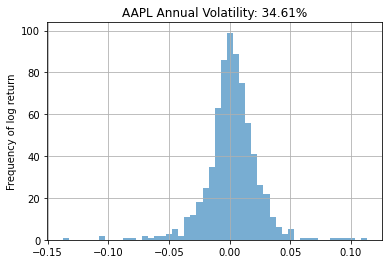

In [45]:
fig, ax =plt.subplots()
data['Log return'].hist(ax=ax, bins=50, alpha= 0.6)
ax.set_label('Log return')
ax.set_ylabel('Frequency of log return')
ax.set_title('AAPL Annual Volatility: '+ AnnVol+'%');

### Moving Average
- rolling(window=)

In [48]:
data.head(3)

,High,Low,Open,Close,Volume,Adj Close,pct_change,Log return
Date,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229,NaN,NaN
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078,-0.099607,-0.104924
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378,0.042689,0.041803


In [49]:
#calculate(sum, mean....) for the last 2 days
data['Close'].rolling(window=2).sum()

Date
2019-01-02           NaN
2019-01-03     75.027500
2019-01-04     72.612499
2019-01-07     74.047497
2019-01-08     74.669998
                 ...    
2021-10-25    297.330002
2021-10-26    297.960007
2021-10-27    298.170013
2021-10-28    301.420013
2021-10-29    302.370010
Name: Close, Length: 714, dtype: float64

In [54]:
data['MA10'] = data['Close'].rolling(10).mean()

In [59]:
data[data['MA10']>0]

,High,Low,Open,Close,Volume,Adj Close,pct_change,Log return,MA10
Date,,,,,,,,,
2019-01-15,38.347500,37.512501,37.567501,38.267502,114843600.0,37.203442,0.020467,0.020260,37.738000
2019-01-16,38.970001,38.250000,38.270000,38.735001,122278800.0,37.657940,0.012217,0.012143,37.663500
2019-01-17,39.415001,38.314999,38.549999,38.965000,119284800.0,37.881550,0.005938,0.005920,38.005250
2019-01-18,39.470001,38.994999,39.375000,39.205002,135004000.0,38.114872,0.006159,0.006141,38.219250
2019-01-22,39.182499,38.154999,39.102501,38.325001,121576000.0,37.259342,-0.022446,-0.022702,38.353500
...,...,...,...,...,...,...,...,...,...
2021-10-25,149.369995,147.619995,148.679993,148.639999,50720600.0,148.639999,-0.000336,-0.000336,146.239998
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,149.320007,0.004575,0.004564,147.020999
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.850006,-0.003148,-0.003153,147.814999


In [62]:
data['EMA10']= data['Close'].ewm(span=10, adjust=False).mean()

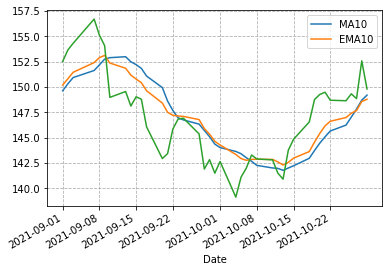

In [76]:
fig, ax =plt.subplots()
data[['MA10','EMA10']].loc['2021-09-01':].plot(ax=ax)
data['Close'].loc['2021-09-01':].plot(ax=ax)
ax.grid(linestyle='--')

In [77]:
data['MA20'] = data['Close'].rolling(20).mean()

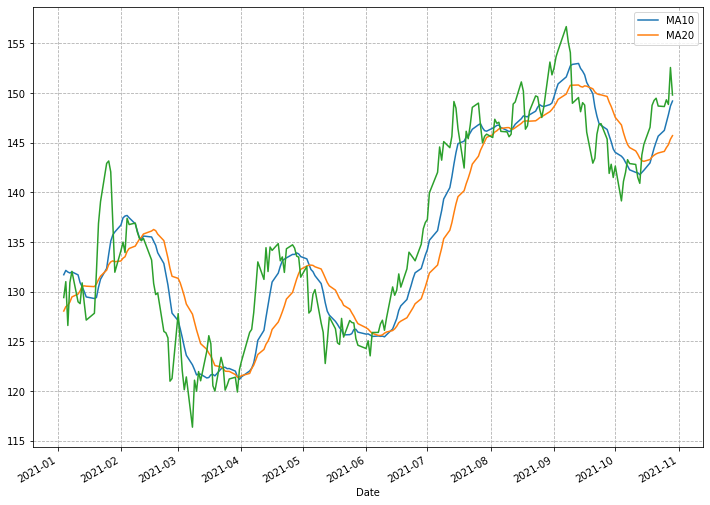

In [82]:
fig, ax =plt.subplots(figsize=(12,9))
data[['MA10','MA20']].loc['2021-01-01':].plot(ax=ax)
data['Close'].loc['2021-01-01':].plot(ax=ax)
ax.grid(linestyle='--')

### MACD
- MACD=12-periodEMA-26-period EMA
- Singal line 9-period EMA of MACD

In [88]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1-exp2
data.head(6)

,High,Low,Open,Close,Volume,Adj Close,pct_change,Log return,MA10,EMA10,MA20,MACD
Date,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229,NaN,NaN,NaN,39.480000,NaN,0.000000
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078,-0.099607,-0.104924,NaN,38.765000,NaN,-0.313704
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378,0.042689,0.041803,NaN,38.455909,NaN,-0.434854
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170,-0.002226,-0.002228,NaN,38.188016,NaN,-0.531398
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565,0.019063,0.018884,NaN,38.097013,NaN,-0.544742
2019-01-09,38.632500,37.407501,37.822498,38.327499,180396400.0,37.261768,0.016982,0.016839,NaN,38.138920,NaN,-0.497935


In [92]:
data['signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [93]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,pct_change,Log return,MA10,EMA10,MA20,MACD,signal line
Date,,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.382229,NaN,NaN,NaN,39.480000,NaN,0.000000,0.000000
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.559078,-0.099607,-0.104924,NaN,38.765000,NaN,-0.313704,-0.062741
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.034378,0.042689,0.041803,NaN,38.455909,NaN,-0.434854,-0.137163
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.954170,-0.002226,-0.002228,NaN,38.188016,NaN,-0.531398,-0.216010
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.639565,0.019063,0.018884,NaN,38.097013,NaN,-0.544742,-0.281757


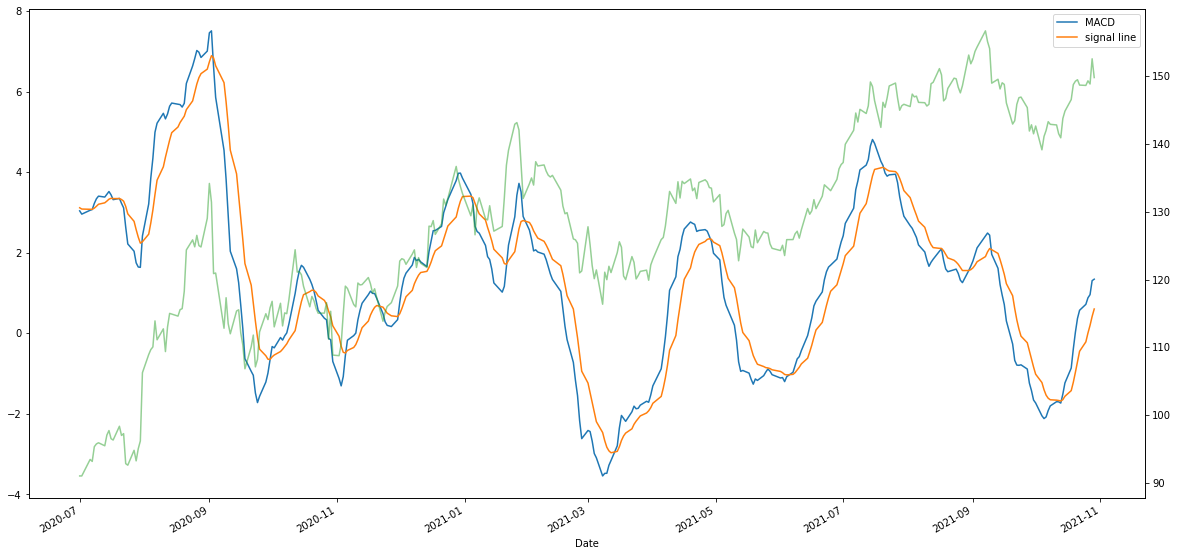

In [106]:
fig, ax =plt.subplots(figsize=(20,10))
data[['MACD','signal line']]['2020-07-01':].plot(ax=ax)
data['Close']['2020-07-01':].plot(ax=ax, alpha=0.5, secondary_y=True);

### Stochastic oscillator
It is used to generate overbought and oversold trading signals, utilizing a 0–100 bounded range of values.

The primary limitation of the stochastic oscillator is that it has been known to produce false signals. This is when a trading signal is generated by the indicator, yet the price does not actually follow through, which can end up as a losing trade. 
During volatile market conditions, this can happen quite regularly. One way to help with this is to take the price trend as a filter, where signals are only taken if they are in the same direction as the trend.

The Formula for the Stochastic Oscillator Is
\begin{aligned} &\text{%K}=\left(\frac{\text{C} - \text{L14}}{\text{H14} - \text{L14}}\right)\times100\\ &\textbf{where:}\\ &\text{C = The most recent closing price}\\ &\text{L14 = The lowest price traded of the 14 previous trading sessions}\\ &\text{H14 = The highest price traded during the same 14-day period}\\ &\text{%K = The current value of the stochastic indicator}\\ &\text{%D = 3-period moving average of %K}\\\end{aligned} 


In [111]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close']-low14)*100/(high14-low14)
data['%D'] = data['%K'].rolling(3).mean()

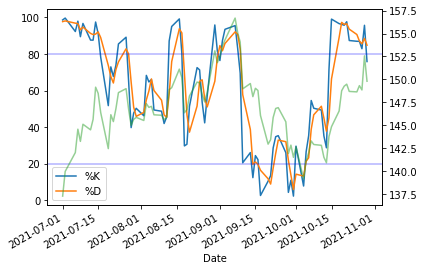

In [129]:
fig, ax =plt.subplots()
data[['%K','%D']]['2021-07-01':].plot(ax=ax)
data['Close']['2021-07-01':].plot(ax=ax, alpha =.5, secondary_y =True)
ax.axhline(80, c='b', alpha=0.3)
ax.axhline(20, c='b', alpha=0.3);